In [1]:
import gym
env = gym.make("CliffWalking-v0")
env.reset()
env.render()

/home/linaro/anaconda3/lib/python3.9/site-packages/gym/envs/toy_text/cliffwalking.py:167: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CliffWalking-v0", render_mode="rgb_array")
  logger.warn(


In [13]:
env.P[15]

{0: [(1.0, 3, -1, False)],
 1: [(1.0, 16, -1, False)],
 2: [(1.0, 27, -1, False)],
 3: [(1.0, 14, -1, False)]}

In [14]:
env.P

{0: {0: [(1.0, 0, -1, False)],
  1: [(1.0, 1, -1, False)],
  2: [(1.0, 12, -1, False)],
  3: [(1.0, 0, -1, False)]},
 1: {0: [(1.0, 1, -1, False)],
  1: [(1.0, 2, -1, False)],
  2: [(1.0, 13, -1, False)],
  3: [(1.0, 0, -1, False)]},
 2: {0: [(1.0, 2, -1, False)],
  1: [(1.0, 3, -1, False)],
  2: [(1.0, 14, -1, False)],
  3: [(1.0, 1, -1, False)]},
 3: {0: [(1.0, 3, -1, False)],
  1: [(1.0, 4, -1, False)],
  2: [(1.0, 15, -1, False)],
  3: [(1.0, 2, -1, False)]},
 4: {0: [(1.0, 4, -1, False)],
  1: [(1.0, 5, -1, False)],
  2: [(1.0, 16, -1, False)],
  3: [(1.0, 3, -1, False)]},
 5: {0: [(1.0, 5, -1, False)],
  1: [(1.0, 6, -1, False)],
  2: [(1.0, 17, -1, False)],
  3: [(1.0, 4, -1, False)]},
 6: {0: [(1.0, 6, -1, False)],
  1: [(1.0, 7, -1, False)],
  2: [(1.0, 18, -1, False)],
  3: [(1.0, 5, -1, False)]},
 7: {0: [(1.0, 7, -1, False)],
  1: [(1.0, 8, -1, False)],
  2: [(1.0, 19, -1, False)],
  3: [(1.0, 6, -1, False)]},
 8: {0: [(1.0, 8, -1, False)],
  1: [(1.0, 9, -1, False)],
  2: 

In [195]:
import numpy as np
n_states = len(env.P)
V = np.zeros(n_states)
policy = np.zeros(n_states)
#V[47] = 0
gamma = 0.9
delta = 1e-8
tst = []
while True:
    # policy evaluation
    vvs = []
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))
    tst.append(np.sum(V))
    while True:
        old_value = V.copy()
        for state in range(len(env.P)):
            vals = []
            v = env.P[state][policy[state]]
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            V[state] = reward + (1-terminal)*gamma*V[s_prime]
            #print(V)

        if np.abs(V - old_value).max() <= delta:
            break

    # update policy
    new_policy = np.zeros(n_states)
    for state in range(len(env.P)):
        vals = []
        for k, v in env.P[state].items():
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            vals.append(reward + (1-terminal)*gamma*V[s_prime])
        new_policy[state] = np.argmax(vals)

    if np.array_equal(new_policy, policy):
        break
    else:
        policy = new_policy


print(V.reshape((4,12)))
print(policy.reshape((4,12)))



[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991
  -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991 -9.99999991]
 [-9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992
  -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992 -9.99999992]
 [-9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993
  -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993 -9.99999993]
 [-9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994
  -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994 -9.99999994]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 

In [196]:
import numpy as np

n_states = len(env.P)
V = np.zeros(n_states)
policy = np.zeros(n_states)
#V[47] = 0
gamma = 0.9
delta = 0.000001
tst2 = []
while True:
    old_value = V.copy()
    tst2.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))
    for state in range(len(env.P)):
        vals = []
        for k, v in env.P[state].items():
            s_prime = v[0][1]
            reward = v[0][2]
            terminal = v[0][3]
            vals.append(reward + (1-terminal)*gamma*V[s_prime])
        V[state] = np.max(vals)
        policy[state] = np.argmax(vals)
    if np.abs(V - old_value).max() <= delta:
        break

print(V.reshape((4,12)))
print(policy.reshape((4,12)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1. ]
 [-1.  -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.9 -1.  -1. ]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]]
[[-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9 ]
 [-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9 ]
 [-1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.9  -1.  ]
 [-1.9  -2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -2.71 -

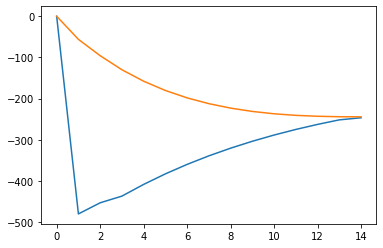

In [197]:
import matplotlib.pyplot as plt
plt.plot(tst)
plt.plot(tst2)

In [12]:
import numpy as np
alpha = 0.5
eps = 0.1
n_states = len(env.P)
n_actions = 4
Q = np.zeros((n_states, n_actions)) + 0
Q[47, :] = 0
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_sarsa = []
gamma = 0.9
action_value_sarsa = []
for e in range(n_episodes):
    sum_rew = 0
    #eps -= 0.005
    obs, _ = env.reset()
    if np.random.rand() < eps:
        a = env.action_space.sample()
    else:
        a = np.argmax(Q[obs])
    timesteps = 0
    while True:
        new_obs, reward, te, tr, prob = env.step(a)
        if np.random.rand() < eps:
            a_new = env.action_space.sample()
        else:
            a_new = np.argmax(Q[new_obs])
        Q[obs, a] += alpha*(reward + gamma*Q[new_obs, a_new] - Q[obs, a])
        sum_rew += reward
        obs = new_obs
        a = a_new
        timesteps += 1
        #if te or tr or timesteps > 100000:
            #break
        if te or tr:
            break
    rewards_sarsa.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1
    

    action_value_sarsa.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))




[[-2.78623555 -2.74056234 -2.26515937 -2.41778672 -2.1931875  -1.8715625
  -1.8121875  -1.60125    -1.2125     -0.975      -0.975      -0.75      ]
 [-3.02656756 -2.92961719 -2.68343578 -2.52989689 -2.13614062 -1.789625
  -1.84334375 -1.8355625  -1.476875   -1.0875     -0.75       -0.5       ]
 [-3.241958   -3.03738016 -2.61675078 -2.69268828 -2.53431094 -1.8644375
  -1.9566875  -1.98153594 -1.295625   -0.975      -0.5        -0.5       ]
 [-3.6756365   0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]
[[3. 1. 0. 2. 1. 2. 2. 1. 1. 3. 3. 2.]
 [0. 2. 0. 0. 1. 3. 3. 1. 0. 1. 2. 3.]
 [1. 0. 1. 0. 3. 0. 3. 3. 3. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-3.38657841 -3.34664586 -3.24267351 -3.01025648 -2.72789906 -2.34745312
  -2.17898437 -1.9424375  -1.6855625  -1.44375    -1.20125    -0.8375    ]
 [-3.37379654 -3.4547168  -3.42311053 -3.24745754 -2.76954432 -2.42864844
  -1.99334375 -2.06559375 -1.48875 

In [13]:
alpha = 0.5
eps = 0.1
n_states = len(env.P)
n_actions = 4
Q = np.zeros((n_states, n_actions)) + 0
Q[47, :] = 0
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_qlearning = []
gamma = 0.9
action_value_q = []
for e in range(n_episodes):
    sum_rew = 0
    timesteps = 0
    obs, _ = env.reset()
    while True:
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[obs])
        new_obs, reward, te, tr, prob = env.step(a)
        Q[obs, a] += alpha*(reward + gamma*np.max(Q[new_obs]) - Q[obs, a])
        sum_rew += reward
        obs = new_obs
        timesteps += 1
        #if te or tr or timesteps > 100000:
            #break
        if te or tr:
            break
    rewards_qlearning.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1

    action_value_q.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))



[[ 0.   -0.5   0.    0.   -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  -0.75]
 [ 0.   -0.5  -0.5   0.    0.    0.    0.    0.    0.    0.    0.   -0.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   -0.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
[[3. 0. 1. 3. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 2. 2. 2. 2. 2. 2. 3. 3. 3.]
 [2. 2. 2. 1. 0. 0. 0. 0. 0. 1. 2. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-2.64908109 -2.61365625 -2.64908109 -2.42548672 -2.22153594 -1.8549375
  -1.6771875  -1.545      -1.42625    -1.325      -0.975      -0.75      ]
 [-2.77372172 -2.49199219 -2.35052953 -2.31509375 -2.291      -1.8299375
  -1.5224375  -1.5224375  -1.5224375  -1.2125     -0.975      -0.5       ]
 [-2.98087479 -2.63032759 -2.26001703 -2.18213961 -2.00225    -1.74778125
  -1.4825     -1.4825     -1.4825     -1.2125     -0.975      -0.5       ]
 [-3.29986891  0.          0.          0.          0.          0.
   0.          0.          0.  

In [14]:
alpha = 0.5
eps = 0.1
n_states = len(env.P)
Q = np.zeros((n_states, n_actions)) + 0
Q[47, :] = 0
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_e_sarsa = []
gamma = 0.9
action_value_e_sarsa = []
for e in range(n_episodes):
    sum_rew = 0
    timesteps = 0
    obs, _ = env.reset()
    while True:
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[obs])
        new_obs, reward, te, tr, prob = env.step(a)
        q_target = 0
        n_actions = len(Q[new_obs])
        for ac in Q[new_obs]:
            if ac == np.max(Q[new_obs]):
                q_target += ac*(1 - eps + (eps/n_actions))
            else:
                q_target += ac*(eps/n_actions)
        Q[obs, a] += alpha*(reward + gamma*q_target - Q[obs, a])
        sum_rew += reward
        obs = new_obs
        timesteps += 1
        #if te or tr or timesteps > 100000:
            #break
        if te or tr:
            break
    rewards_e_sarsa.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1

    action_value_e_sarsa.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))

[[ 0.         -0.5        -0.5         0.          0.          0.
   0.          0.          0.         -0.5        -0.5        -0.505625  ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.50581484]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]]
[[3. 2. 2. 2. 2. 2. 2. 2. 3. 0. 2. 1.]
 [2. 1. 1. 0. 0. 0. 0. 0. 1. 1. 2. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-3.16736059 -2.85685998 -2.53478367 -2.46532566 -2.38403423 -2.03997789
  -2.05021596 -2.05898333 -2.05000773 -1.63852782 -1.29889524 -0.9907824 ]
 [-3.38152607 -3.16470039 -2.83593821 -2.46348798 -2.54069081 -2.06040329
  -1.95845134 -1.90279297 -1.69352909 -1.34865883 -1.28

In [16]:
alpha = 0.5
eps = 0.1
n_states = len(env.P)
n_actions = 4
Q1 = np.zeros((n_states, n_actions)) + 0
Q2 = np.zeros((n_states, n_actions)) + 0
Q1[47, :] = 0
Q2[47, :] = 0
Q = Q1 + Q2
n_episodes = 500
env = gym.make("CliffWalking-v0")
rewards_dqlearning = []
gamma = 0.9
action_value_dq = []
for e in range(n_episodes):
    sum_rew = 0
    timesteps = 0
    obs, _ = env.reset()
    while True:
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[obs])
        new_obs, reward, te, tr, prob = env.step(a)

        if np.random.rand() > 0.5:
            Q1[obs, a] += alpha*(reward + gamma*Q2[new_obs, np.argmax(Q1[new_obs])] - Q1[obs, a])
        else:
            Q2[obs, a] += alpha*(reward + gamma*Q1[new_obs, np.argmax(Q2[new_obs])] - Q2[obs, a])
        Q = (Q1 + Q2)/2
        sum_rew += reward
        obs = new_obs
        timesteps += 1
        #if te or tr or timesteps > 100:
            #break
        if te or tr:
            break
    rewards_dqlearning.append(sum_rew)
    V = np.zeros(n_states)
    policy = np.zeros(n_states)
    i = 0
    for s in Q:
        V[i] = np.max(s)
        policy[i] = np.argmax(s)
        i += 1

    action_value_dq.append(np.sum(V))
    print(V.reshape((4,12)))
    print(policy.reshape((4,12)))

[[ 0.     -0.25   -0.25   -0.25   -0.25   -0.25   -0.25   -0.3625 -0.25
  -0.25   -0.25   -0.3625]
 [ 0.      0.      0.      0.      0.      0.      0.     -0.25    0.
   0.     -0.25   -0.3625]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.    ]]
[[3. 1. 1. 0. 0. 0. 2. 2. 2. 2. 1. 3.]
 [2. 2. 2. 2. 2. 2. 2. 0. 1. 2. 2. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ -7.86348406  -3.63765212  -2.93806055  -2.43570088  -2.2067283
   -1.29213035  -1.81926672  -1.05730117  -0.831875    -0.6125
   -0.4875      -0.6125    ]
 [ -7.28971109  -3.0396485   -3.30027313  -3.45472049  -1.26295797
   -1.73889063  -1.72751536  -0.85049219  -0.900625    -0.831875
   -0.3625      -0.3625    ]
 [ -3.32425986  -1.05559375  -3.34294204  -1.18283047  -0.82885937
   -0.55303281  -0.51746875  -0.97403125  -0.6196875   -0.55303281

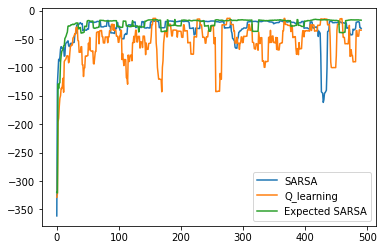

In [17]:
import matplotlib.pyplot as plt
plt.plot(np.convolve(rewards_sarsa, np.ones(10)/10, mode="valid")[:])
plt.plot(np.convolve(rewards_qlearning, np.ones(10)/10, mode="valid")[:])
plt.plot(np.convolve(rewards_e_sarsa, np.ones(10)/10, mode="valid")[:])
#plt.plot(np.convolve(rewards_dqlearning, np.ones(10)/10, mode="valid")[200:])
plt.legend(["SARSA", "Q_learning", "Expected SARSA", "Double Q-learning"])

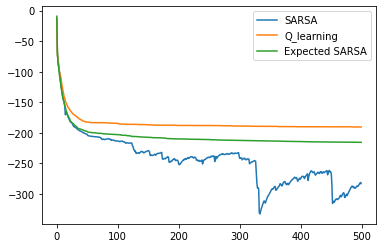

In [ ]:
plt.plot(action_value_sarsa[:])
plt.plot(action_value_q[:])
plt.plot(action_value_e_sarsa[:])
#plt.plot(action_value_dq[200:])
plt.legend(["SARSA", "Q_learning", "Expected SARSA", "Double Q-learning"])